# Andrew Austin - Final Project - INF2178

In [16]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sfa
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
from scipy.stats import normaltest
from scipy.stats import shapiro
import math as ma
import pylab

In [2]:
#Import and check the data
df = pd.read_csv('diabetes.csv')
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [3]:
#Look at the 
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Cleaning the Data (Tidy Data)

In [4]:
#Check to see if there are any missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# ∴ No missing values

In [5]:
#Check to see how many 0s are in the data
pd.DataFrame((df == 0).astype(int).sum(axis=0), columns=["Number of 0s"])

Number of 0s
Pregnancies                        111
Glucose                              5
BloodPressure                       35
SkinThickness                      227
Insulin                            374
BMI                                 11
DiabetesPedigreeFunction             0
Age                                  0
Outcome                            500

0s are not acceptable in all situations. Issue Columns: Glucose, BloodPressure, SkinThickness, Insulin & BMI

In [6]:
#Check to see what the types of data are
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

∴ We see that BMI & Diabetes Pedigree Function are floats, while everything else is an integer

Text(0.5, 1.0, 'BMI vs Outcome')

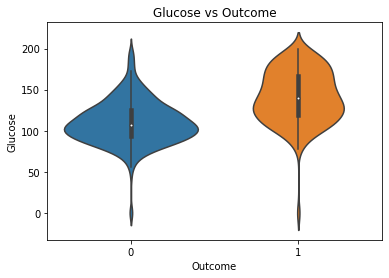

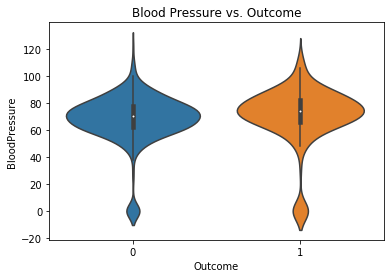

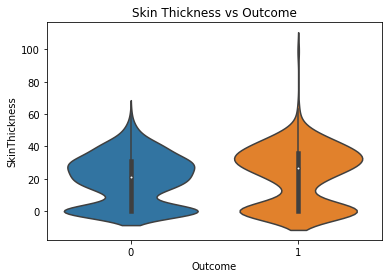

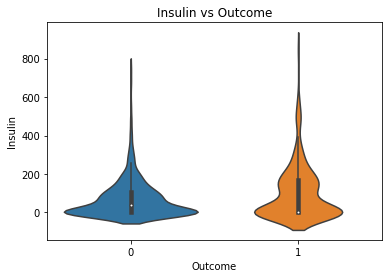

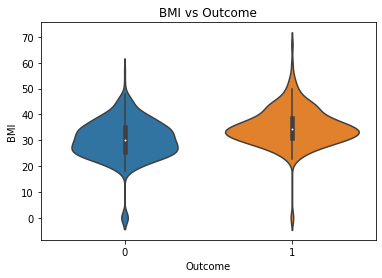

In [7]:
#Lets look into these 4 columns that have 0 values that shouldn't in more detail to see how the data is spread out
plt.figure(1)
sns.violinplot(x='Outcome',y='Glucose',data=df)
plt.title('Glucose vs Outcome')
plt.figure(2)
sns.violinplot(x='Outcome',y='BloodPressure',data=df)
plt.title('Blood Pressure vs. Outcome')
plt.figure(3)
sns.violinplot(x='Outcome',y='SkinThickness',data=df)
plt.title('Skin Thickness vs Outcome')
plt.figure(4)
sns.violinplot(x='Outcome',y='Insulin',data=df)
plt.title('Insulin vs Outcome')
plt.figure(5)
sns.violinplot(x='Outcome',y='BMI',data=df)
plt.title('BMI vs Outcome')

#Deal with the columns in question

Based on the violin plots we can confirm that Glucose & BMI have very few rows with 0s, while the others have quite a few so we will eliminate the rows Glucose & BMI and change the others to NaN

In [9]:
#BloodPressure replace 0 with NaN
df["BloodPressure"].replace(0, np.nan, inplace=True)

#SkinThickness  replace 0 with NaN
df["SkinThickness"].replace(0, np.nan, inplace=True)

#Insulin  replace 0 with NaN
df["Insulin"].replace(0, np.nan, inplace=True)

In [10]:
#Eliminate rows for Glucose and BMI that have a value of 0
low_count = ['Glucose', 'BMI']

for data in low_count:
    data_name = df[(df[data] == 0)].index
    df.drop(data_name, inplace = True)

In [11]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   752.000000  752.000000     724.000000     534.000000  392.000000   
mean      3.851064  121.941489      72.400552      29.172285  156.056122   
std       3.375189   30.601198      12.379870      10.507582  118.841690   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      22.000000   76.750000   
50%       3.000000  117.000000      72.000000      29.000000  125.500000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  752.000000                752.000000  752.000000  752.000000  
mean    32.454654                  0.473051   33.312500    0.351064  
std      6.928926                  0.330108   11.709395    0.477621  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.244000   24.000000    0.000000  
50%     32.300000                  0.377000   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Research Question: Do elavated glucose levels result in diabetes?

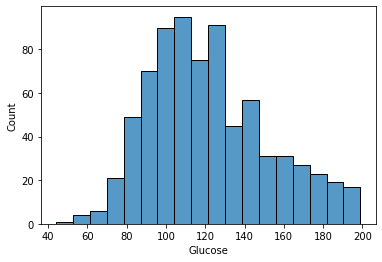

In [12]:
sns.histplot(df['Glucose'])

In [17]:
shapiro(df['Glucose'])

ShapiroResult(statistic=0.9699156880378723, pvalue=2.554101548313259e-11)

Normality Test

In [18]:
#Normality Testing (D’Agostino’s K^2 Test)
stat, p = normaltest(df['Glucose'])
print('pvalue=', p)
# interpret
alpha = 0.05
if p > alpha:
	print('Fail to reject null')
else:
	print('Reject null')

pvalue= 3.2381487731081995e-08
Reject null


Therefore it can be said that we are rejected the null hypothesis since the p value is less than 0.05

Glucose is not normally distributed

Exploratory Data Analysis

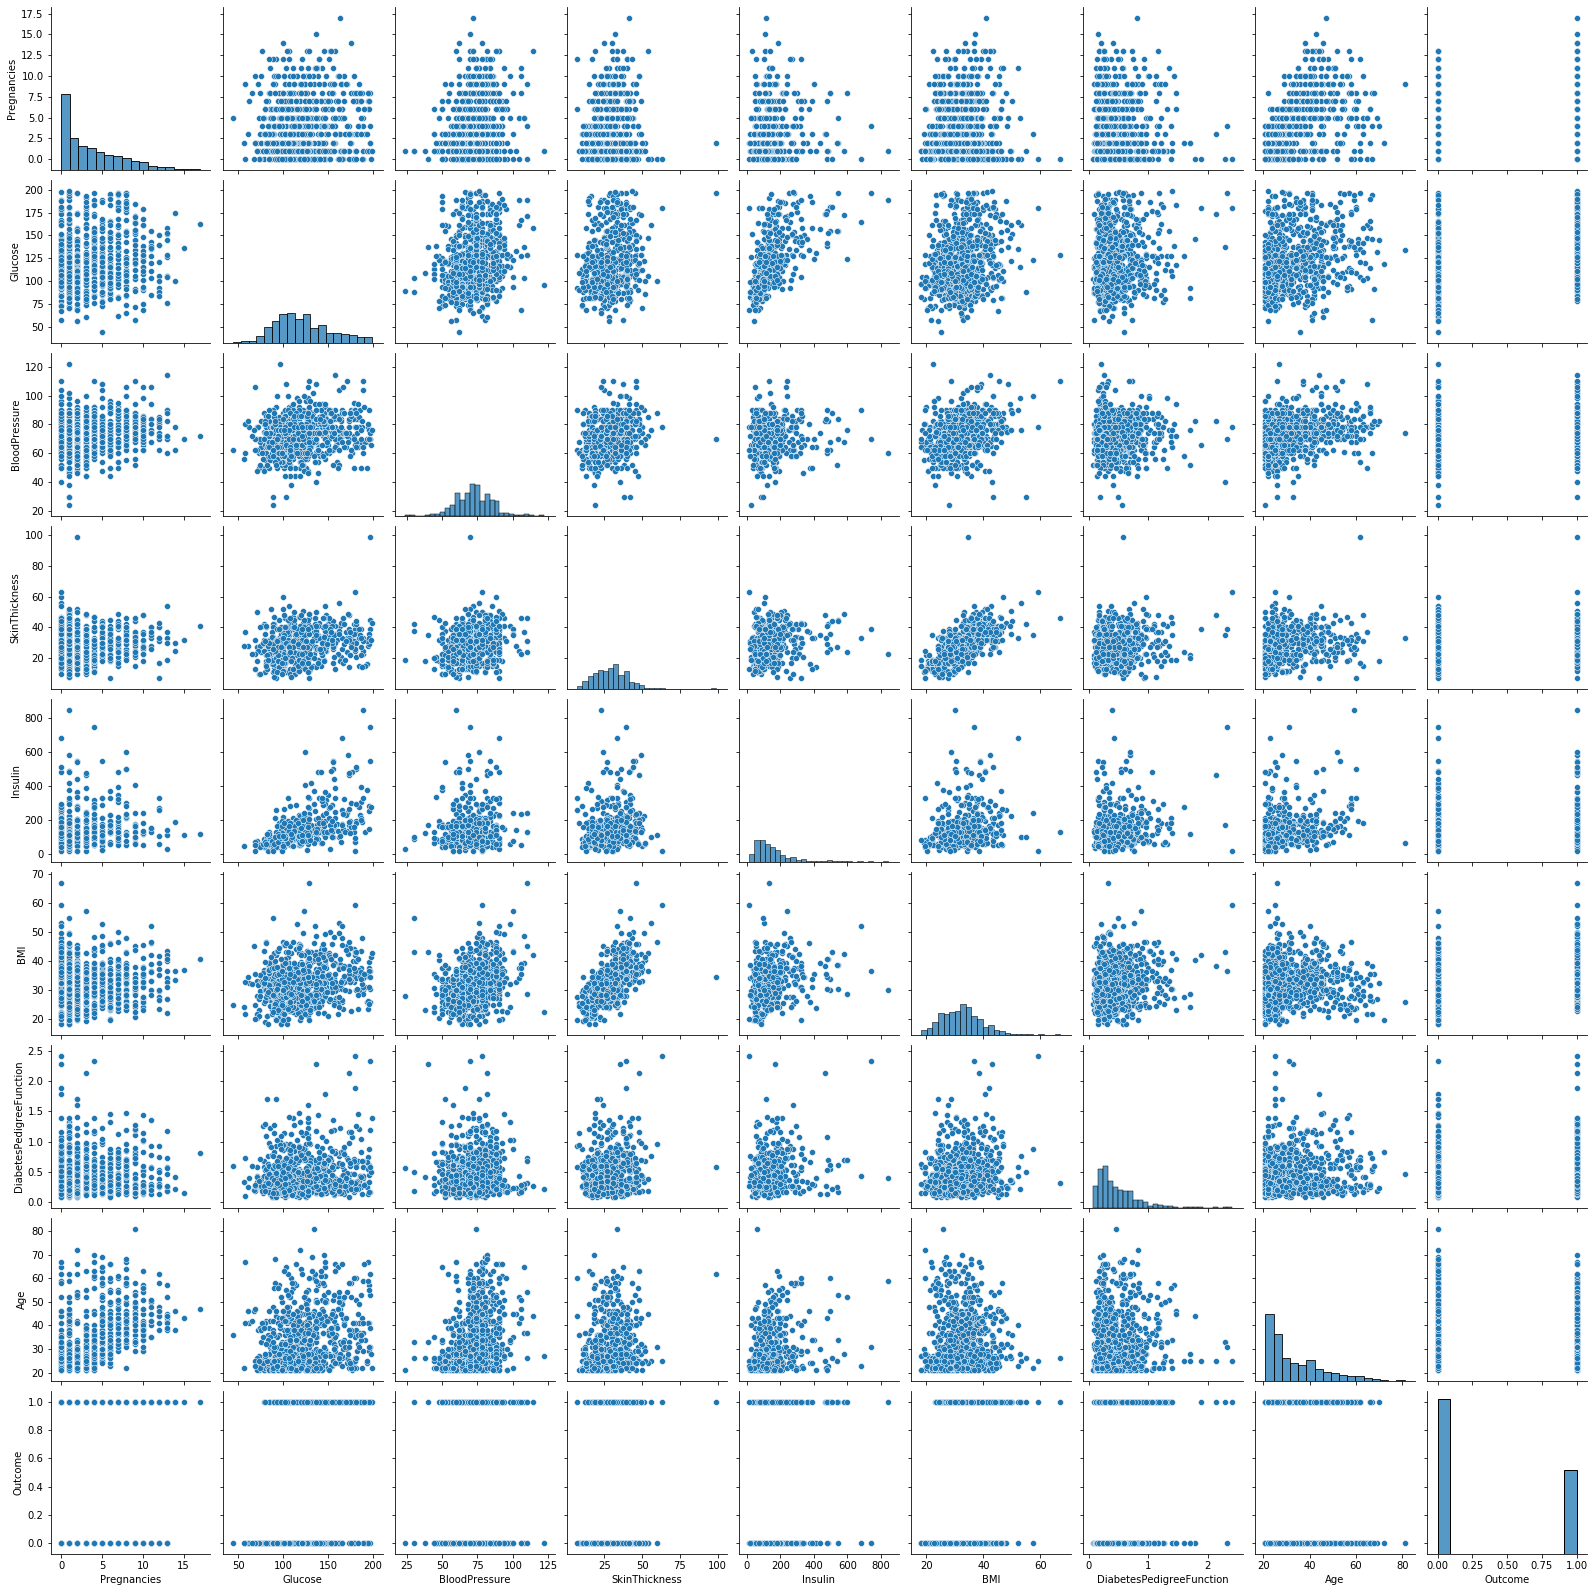

In [19]:
sns.pairplot(df)

C:\Users\andjo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andjo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andjo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

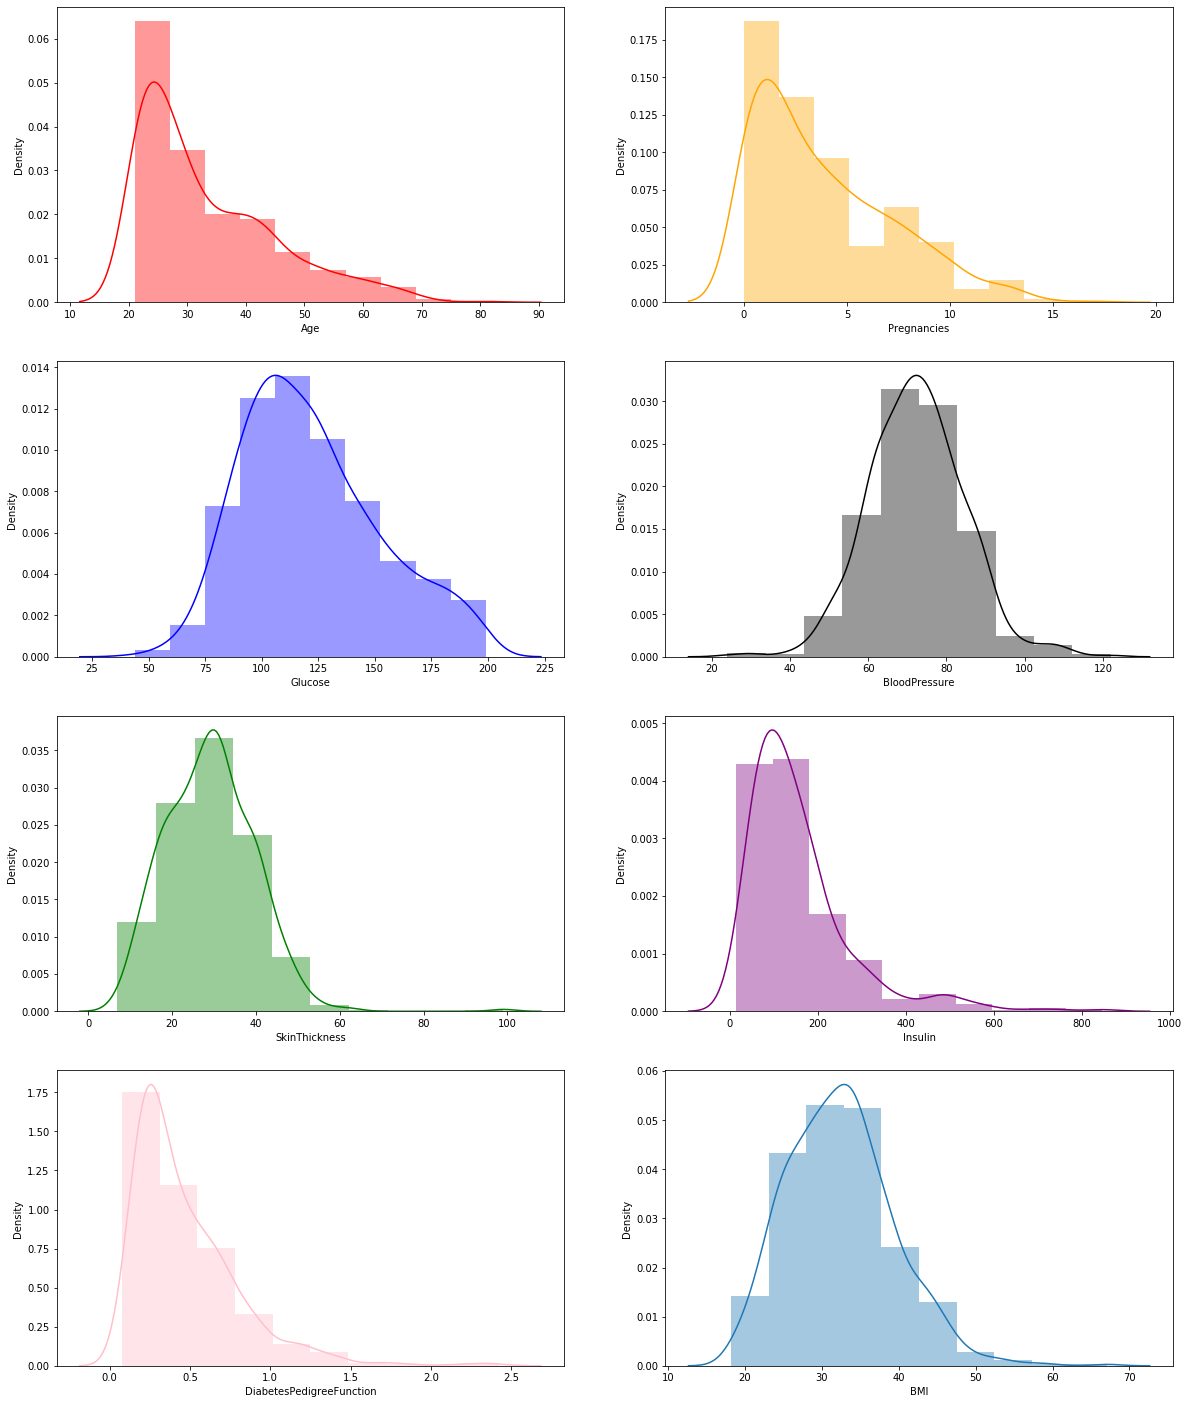

In [20]:
# Histogram and density graphs of all variables were accessed. to test Normality
fig, ax = plt.subplots(4,2, figsize=(20,25))
sns.distplot(df.Age, bins = 10, color = 'red', ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 10, color = 'orange', ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 10, color = 'blue', ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 10, color = 'black', ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 10, color = 'green', ax=ax[2,0])
sns.distplot(df.Insulin, bins = 10, color = 'purple', ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 10, color = 'pink', ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 10, ax=ax[3,1]) 

Heatmap

Text(0.5, 1, 'Diabetes Heatmap')

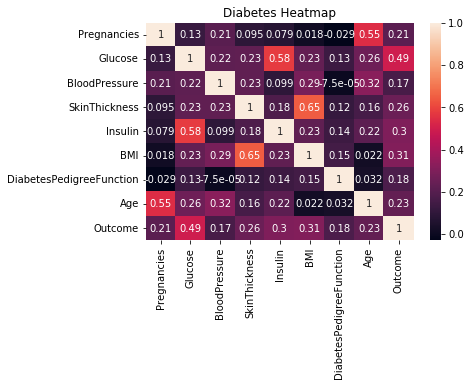

In [21]:
#Heatmap to see correlation of variables
corr = df.corr()
ax = plt.axes()
sns.heatmap(corr,
            xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, annot=True)
ax.set_title('Diabetes Heatmap')

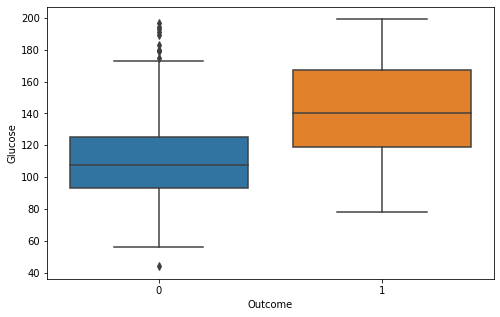

In [24]:
#Looking at how the outcome is spread between Glucose levels
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='Glucose', data=df, ax=ax)

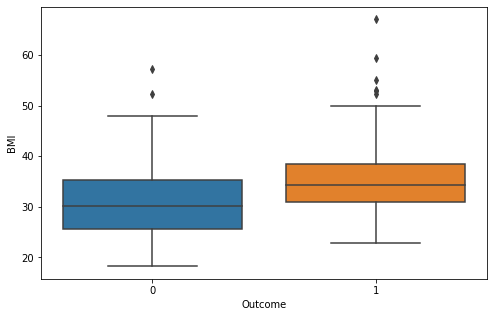

In [25]:
#Looking at how the outcome is spread between BMI levels
f, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Outcome', y='BMI', data=df, ax=ax)

Testing Normality

Text(0.5, 1.0, 'Histogram for Glucose')

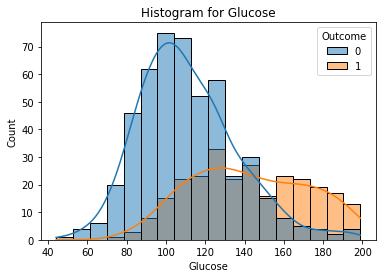

In [33]:
#Glucose is elavated for people with diabetes
sns.histplot(x="Glucose", hue="Outcome", data=df, kde=True)
plt.title('Histogram for Glucose')

Text(0.5, 1.0, 'Histogram for BMI')

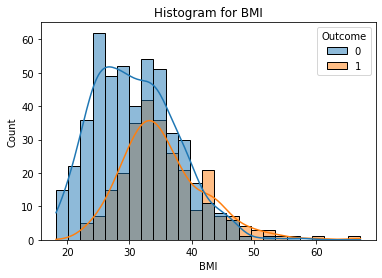

In [34]:
#BMI is elavated for people with diabetes
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True)
plt.title('Histogram for BMI')

C:\Users\andjo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


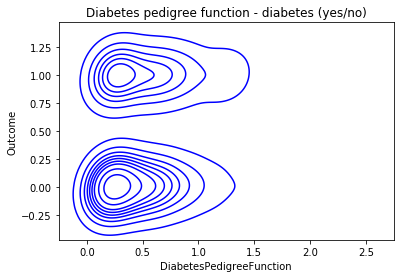

C:\Users\andjo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


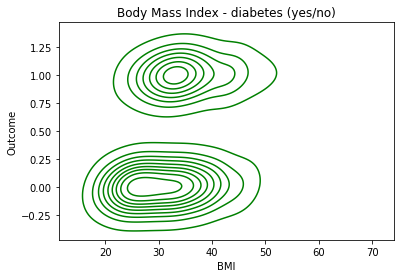

C:\Users\andjo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


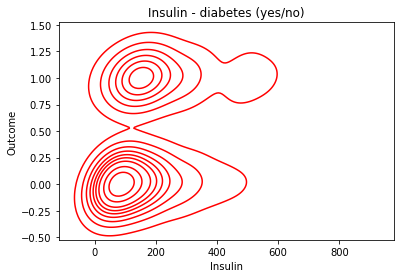

C:\Users\andjo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


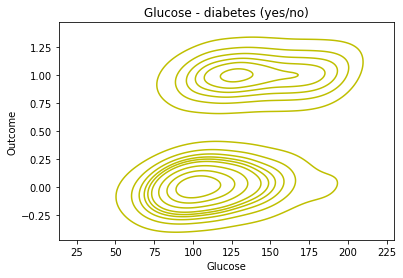

In [36]:
#We can also see that the variables are elevated when the outcome = 1 (they have diabetes)
sns. kdeplot(df['DiabetesPedigreeFunction'], df['Outcome'], color="b")
plt.title('Diabetes pedigree function - diabetes (yes/no)')
plt.show()
sns. kdeplot(df[ 'BMI'], df['Outcome'], color="g")
plt.title('Body Mass Index - diabetes (yes/no)')
plt.show()
sns. kdeplot(df['Insulin'], df['Outcome'], color="r")
plt.title('Insulin - diabetes (yes/no)')
plt. show()
sns. kdeplot(df['Glucose'], df['Outcome'], color="y")
plt.title('Glucose - diabetes (yes/no)')
plt.show()

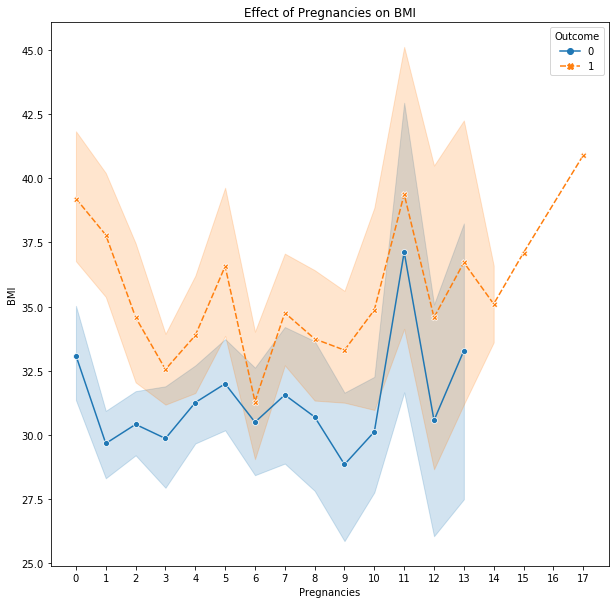

In [42]:
#Looking more closely at BMI 
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='BMI',data=df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on BMI')
plt.show()

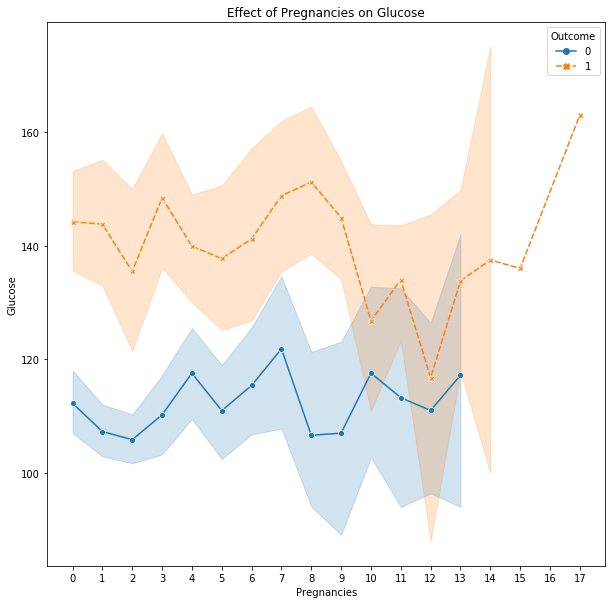

In [43]:
#Looking more closely at Glucose
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='Glucose',data=df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Glucose')
plt.show()

Both of these graphs seem to be very similar showing both are evelated when they have diabetes, but the number of pregnancies does not seem to have much of an impact

# T-Tests

Glucose

In [44]:
#Null hypothesis = no difference between mean Glucose for people with diabetes vs people who do not have diabetes
#Alternative hypothesis = there is a difference between mean glucose for people with diabetes vs people who do not have diabetes
positive_df = df[df.Outcome == 1]
negative_df = df[df.Outcome == 0]
tStat, pValue = stats.ttest_ind(positive_df['Glucose'], negative_df['Glucose'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean Glucose for people who have diabetes and people who do not have diabetes")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean Glucose for people who have diabetes and people who do not have diabetes")
    

P-Value: 9.080597067383534e-41 T-Statistic:14.774680180805138
Null hypothesis rejected: there is a statistically significant difference between mean Glucose for people who have diabetes and people who do not have diabetes


In [87]:
#Calculating confidence intervals
from scipy.stats import t
from math import sqrt

def calculateCI(samp1, samp2, variable):
    N1 = len(samp1)
    N2 = len(samp2)
    df = (N1 + N2 - 2)
    std1 = samp1[variable].std()
    std2 = samp2[variable].std()
    std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

    diff_mean = samp1[variable].mean() - samp2[variable].mean()
    MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

    print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

calculateCI(positive_df, negative_df, 'Glucose')


The difference between groups is 31.7 [27.7 to 35.7] (mean [95% CI])


In [45]:
#Effect Size for Glucose
def calculateCohen(samp1,samp2):
    diff = abs(samp1.mean()-samp2.mean())
    pooledstdev = ma.sqrt((samp1.std()**2 + samp2.std()**2)/2)
    cohend = round(diff/pooledstdev,2)
    return cohend

calculateCohen(positive_df.Glucose, negative_df.Glucose)

1.16

Therefore the effect size is larger than one standard deviation (1.16)


BMI

In [47]:
#Null hypothesis = no difference between mean BMI for people with diabetes vs people who do not have diabetes
#Alternative hypothesis = there is a difference between mean BMI for people with diabetes vs people who do not have diabetes
positive_df = df[df.Outcome == 1]
negative_df = df[df.Outcome == 0]
tStat, pValue = stats.ttest_ind(positive_df['BMI'], negative_df['BMI'], equal_var=False)
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean BMI for people who have diabetes and people who do not have diabetes")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean BMI for people who have diabetes and people who do not have diabetes")
    

P-Value: 8.354753823180862e-18 T-Statistic:8.904086646548834
Null hypothesis rejected: there is a statistically significant difference between mean BMI for people who have diabetes and people who do not have diabetes


#Effect Size for BMI
def calculateCohen(samp1,samp2):
    diff = abs(samp1.mean()-samp2.mean())
    pooledstdev = ma.sqrt((samp1.std()**2 + samp2.std()**2)/2)
    cohend = round(diff/pooledstdev,2)
    return cohend

calculateCohen(positive_df.BMI, negative_df.BMI)

Therefore the effect size is 0.68 standard deviations away from each other

In [88]:
#Calculating confidence intervals
from scipy.stats import t
from math import sqrt

def calculateCI(samp1, samp2, variable):
    N1 = len(samp1)
    N2 = len(samp2)
    df = (N1 + N2 - 2)
    std1 = samp1[variable].std()
    std2 = samp2[variable].std()
    std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

    diff_mean = samp1[variable].mean() - samp2[variable].mean()
    MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

    print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

calculateCI(positive_df, negative_df, 'BMI')


The difference between groups is 4.5 [3.5 to 5.5] (mean [95% CI])


# Multiple Linear Regression

In [50]:
#Multiple Linear Regression
#Independant Variables: BMI, Age, Insulin
#Dependant Variable: Glucose
X = df[['BMI','Age','Pregnancies']]
y = df['Glucose']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(f'intercept: {regressor.intercept_}')

intercept: 64.95308602819578


In [52]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
BMI             1.005787
Age             0.746089
Pregnancies    -0.244401

In [53]:
#For every increase by one unit of BMI, age and with every pregnancy respectively, Glucose increases by 1.00, 0.75 and decreases 0.24 mg/dL

print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.11820151004874167


This r square value tells us that they do not explain significant differences in the glucose levels as they are above 0.05

In [54]:
#Calculating predicted values below
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual   Predicted
661     199  124.270922
148     147  146.121923
425     184  124.318380
84      137  140.418804
221     158  145.489063
..      ...         ...
477     114  110.308787
123     132  142.166350
458     148  138.377236
589      73  104.827431
767      93  112.444672

[151 rows x 2 columns]

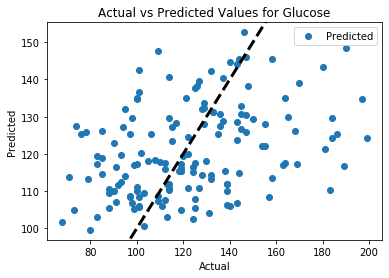

In [56]:
#Plotting actual vs predicted values for insulin
df.plot(x='Actual', y='Predicted', style='o')
plt.title('Actual vs Predicted Values for Glucose')
plt.xlabel('Actual')
plt.ylabel('Predicted')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show()

In [58]:
#As we can see above, our model does not do a good job at predicting insulin based on pregnancies

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21.114004711002323
Mean Squared Error: 734.7424535041016
Root Mean Squared Error: 27.106133134479023


Our root mean squared error shows us that the standard deviation of our residuals is about 27, or in simpler terms, the difference between predicted and observed insulin levels is 'typically' 27 mg/dL.

# ANOVA

In [46]:
#Initial ANOVA test for Glucose
tStat, pValue = stats.f_oneway(positive_df['Glucose'], negative_df['Glucose'])
print("P-Value: {0} T-Statistic:{1}".format(pValue,tStat))
if pValue < 0.05:
    print("Null hypothesis rejected: there is a statistically significant difference between mean glucose for people with/without diabetes")
else:
    print("Fail to reject null hypothesis: there is no significant difference between mean glucose for people with/without diabetes")
    

P-Value: 1.4656454786840522e-47 T-Statistic:242.35742414971793
Null hypothesis rejected: there is a statistically significant difference between mean glucose for people with/without diabetes


In [89]:
# Do ANOVA on Glucose ~ Age
aov = pg.anova(data=df, dv='Glucose',between='Age',detailed=True)
aov

KeyError: 'Glucose'

# Adding Categories for futher testing

In [74]:
def age_to_age_group(row):
    if 21 <= row["Age"] < 30:
        return "Young Adult"
    elif 30 <= row["Age"] < 65:
        return "Adult"
    else:
        return "Elder"


# Data used to categorize taken from the Mayo Clinic https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982
def blood_pressure_to_blood_pressure_group(row):
    if row["BloodPressure"] < 80:
        return "Normal"
    elif row["BloodPressure"] < 90:
        return "Stage 1 High BP"
    elif row["BloodPressure"] >= 90:
        return "Stage 2 High BP"
    else:
        return None


# Data used to categorize taken from the Cleveland Clinic https://health.clevelandclinic.org/bmi-for-women/
    if row["BMI"] < 18.5:
        return "Underweight"
    elif row["BMI"] < 25:
        return "Normal"
    elif row["BMI"] < 30:
        return "Overweight"
    elif row["BMI"] > 30:
        return "Obese"
    else:
        return None


df["AgeGroup"] = df.apply (age_to_age_group, axis=1)
df["BloodPressureGroup"] = df.apply (blood_pressure_to_blood_pressure_group, axis=1)
df["BMIGroup"] = df.apply (bmi_to_bmi_group, axis=1)
df

KeyError: 'Age'

Could not figure out how to deal with the KeyError

# ANCOVA

In [78]:
import pingouin as pg
from pingouin import ancova

In [81]:
pg.ancova(data=df, dv='SkinThickness', between='BloodPressure', covar='Age')

AssertionError: SkinThickness is not in data.

Not sure why this error kept occuring

# Power 

In [91]:
#parameters
effect_size = 1.16
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
                                         power = power,
                                         alpha = alpha)
print('Sample Size required is: {0:.2f}'.format(sample_size))

Sample Size required is: 12.70


In [93]:
#parameters
effect_size = 0.68
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
                                         power = power,
                                         alpha = alpha)
print('Sample Size required is: {0:.2f}'.format(sample_size))

Sample Size required is: 34.94


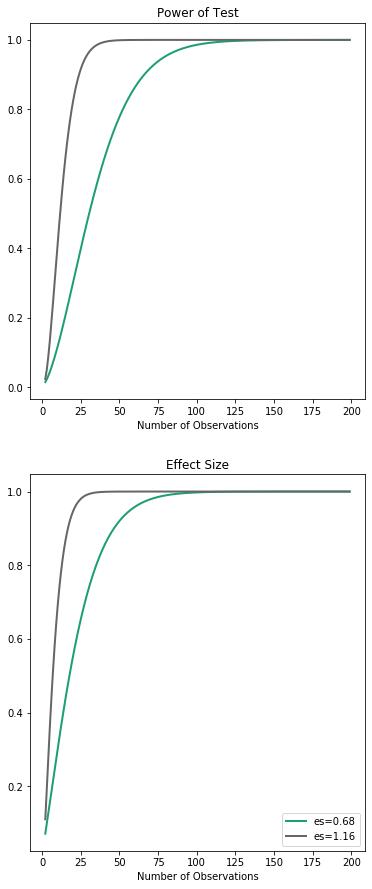

In [95]:
#Power visualization
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',nobs=np.arange(2,200),effect_size=np.array([0.68,1.16]),alpha=0.01,ax=ax, title="Power of Test")
ax.get_legend().remove()
ax= fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',nobs=np.arange(2,200),effect_size=np.array([0.68,1.16]),alpha=0.05,ax=ax, title="Effect Size")
fig.subplots_adjust(top=3.0)

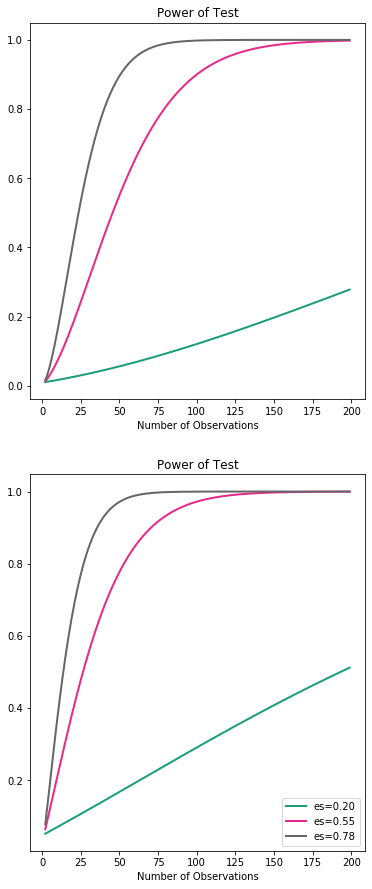

In [84]:
#Power visualization for 0.55 and 0.78 effect sizes
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',nobs=np.arange(2,200),effect_size=np.array([0.2,0.55,0.78]),alpha=0.01,ax=ax, title="Power of Test")
ax.get_legend().remove()
ax= fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',nobs=np.arange(2,200),effect_size=np.array([0.2,0.55,0.78]),alpha=0.05,ax=ax, title="Power of Test")
fig.subplots_adjust(top=3.0)


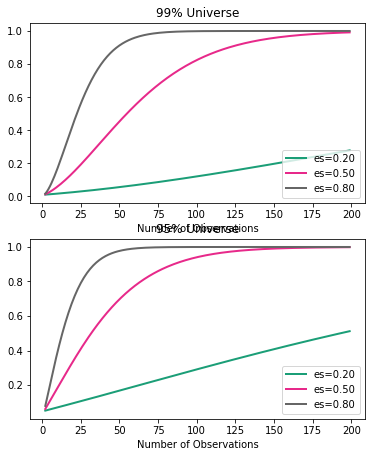

In [86]:
#Power = P(rejecting H_0 | H_a = true) [The probability of rejecting the null hypothesis when the alterntaive hypothesis is true]
#Power = 1 - P(failure to reject H_0 | H_a = false)

#Visualization of Power
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
                                 nobs = np.arange(2,200),
                                 effect_size=np.array([0.2,0.5,0.8]),
                                alpha=0.01,
                                ax=ax, title="99% Universe")
#ax.get_legend.remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
                                 nobs = np.arange(2,200),
                                 effect_size=np.array([0.2,0.5,0.8]),
                                alpha=0.05,
                                ax=ax, title="95% Universe")
fig.subplots_adjust(top=1.5)